In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [2]:
#given in question
lam = np.arange(1,13,1)
freq = np.array([3500,5300,5200,4700,3800,2700,2000,1300,850,500,400,300])
frac=freq/np.sum(freq)
#frac=np.array([0.115,0.177,0.174,0.152,0.122,0.082,0.062,0.042,0.032,0.016,0.014,0.012])
mean_lam=np.sum(lam*frac)/np.sum(frac)
f = 5 #1/m
area =27.5 #km2
qb = 5 #m3/s
ko = 10 #m/h
n = 0.45
theta_i = 0.2 #m3/m3
p=120 #mm
#my convention is to convert everything in m and m/hr
qb=qb*60*60
area=area*1000000
p=p/1000
#intermediate variables
m=(n-theta_i)/f
#mean_lam=np.mean(lam)
rb=qb/area
to=ko/f
ln_t_rb=np.log(to/rb)
mean_D=-m*(np.log(rb)-np.log(to)+mean_lam)
mean_z = (-1/f)*(np.log(rb)-np.log(to)+mean_lam)


In [3]:
df=pd.DataFrame(np.vstack((lam,freq,frac)).T, columns=['lam','freq','frac'])

In [4]:
df.head()

,lam,freq,frac
0,1.0,3500.0,0.114566
1,2.0,5300.0,0.173486
2,3.0,5200.0,0.170213
3,4.0,4700.0,0.153846
4,5.0,3800.0,0.124386


In [5]:
df['cum_frac']=df.frac.cumsum()

In [6]:
df.tail()

,lam,freq,frac,cum_frac
7,8.0,1300.0,0.042553,0.932897
8,9.0,850.0,0.027823,0.960720
9,10.0,500.0,0.016367,0.977087
10,11.0,400.0,0.013093,0.990180
11,12.0,300.0,0.009820,1.000000


In [7]:
mask = df['lam']>=ln_t_rb
mask1 = df['lam']<ln_t_rb

In [8]:
df['sat_frac'] = ""
df.loc[mask1, 'sat_frac'] = 0
df.loc[mask, 'sat_frac'] = df.loc[mask, 'frac']

In [9]:
df.tail()

,lam,freq,frac,cum_frac,sat_frac
7,8.0,1300.0,0.042553,0.932897,0
8,9.0,850.0,0.027823,0.960720,0.0278232
9,10.0,500.0,0.016367,0.977087,0.0163666
10,11.0,400.0,0.013093,0.990180,0.0130933
11,12.0,300.0,0.009820,1.000000,0.00981997


In [10]:
df['cum_sat_frac']=df.sat_frac.cumsum()

In [11]:
df.tail()

,lam,freq,frac,cum_frac,sat_frac,cum_sat_frac
7,8.0,1300.0,0.042553,0.932897,0,0
8,9.0,850.0,0.027823,0.960720,0.0278232,0.0278232
9,10.0,500.0,0.016367,0.977087,0.0163666,0.0441899
10,11.0,400.0,0.013093,0.990180,0.0130933,0.0572831
11,12.0,300.0,0.009820,1.000000,0.00981997,0.0671031


In [12]:
df['D']=mean_D-m*(df['lam']-mean_lam)
mask=df['D']<0
df.loc[mask, 'D']=0

In [13]:
df['z']=mean_z-((1/f)*(df['lam']-mean_lam))
mask=df['z']<0
df.loc[mask, 'z']=0

In [14]:
df['rain']=p

In [15]:
df.head()

,lam,freq,frac,cum_frac,sat_frac,cum_sat_frac,D,z,rain
0,1.0,3500.0,0.114566,0.114566,0,0,0.351236,1.404943,0.12
1,2.0,5300.0,0.173486,0.288052,0,0,0.301236,1.204943,0.12
2,3.0,5200.0,0.170213,0.458265,0,0,0.251236,1.004943,0.12
3,4.0,4700.0,0.153846,0.612111,0,0,0.201236,0.804943,0.12
4,5.0,3800.0,0.124386,0.736498,0,0,0.151236,0.604943,0.12


In [16]:
df['D_p']=df['D']-df['rain']
mask=df['D_p']>0
mask1=df['D_p']<0
df['Do']=""
df.loc[mask,'Do'] = df.loc[mask,'D_p']
df.loc[mask1,'Do'] = 0

In [17]:
df.head()

,lam,freq,frac,cum_frac,sat_frac,cum_sat_frac,D,z,rain,D_p,Do
0,1.0,3500.0,0.114566,0.114566,0,0,0.351236,1.404943,0.12,0.231236,0.231236
1,2.0,5300.0,0.173486,0.288052,0,0,0.301236,1.204943,0.12,0.181236,0.181236
2,3.0,5200.0,0.170213,0.458265,0,0,0.251236,1.004943,0.12,0.131236,0.131236
3,4.0,4700.0,0.153846,0.612111,0,0,0.201236,0.804943,0.12,0.081236,0.0812358
4,5.0,3800.0,0.124386,0.736498,0,0,0.151236,0.604943,0.12,0.031236,0.0312358


In [18]:
df.tail()

,lam,freq,frac,cum_frac,sat_frac,cum_sat_frac,D,z,rain,D_p,Do
7,8.0,1300.0,0.042553,0.932897,0,0,0.001236,0.004943,0.12,-0.118764,0
8,9.0,850.0,0.027823,0.960720,0.0278232,0.0278232,0.000000,0.000000,0.12,-0.120000,0
9,10.0,500.0,0.016367,0.977087,0.0163666,0.0441899,0.000000,0.000000,0.12,-0.120000,0
10,11.0,400.0,0.013093,0.990180,0.0130933,0.0572831,0.000000,0.000000,0.12,-0.120000,0
11,12.0,300.0,0.009820,1.000000,0.00981997,0.0671031,0.000000,0.000000,0.12,-0.120000,0


In [19]:
df['z_p']=df['z']-(df['rain']/(n-theta_i))
mask=df['z_p']>0
mask1=df['z_p']<0
df['zo']=""
df.loc[mask,'zo'] = df.loc[mask,'z_p']
df.loc[mask1,'zo'] = 0

In [20]:
df.tail()

,lam,freq,frac,cum_frac,sat_frac,cum_sat_frac,D,z,rain,D_p,Do,z_p,zo
7,8.0,1300.0,0.042553,0.932897,0,0,0.001236,0.004943,0.12,-0.118764,0,-0.475057,0
8,9.0,850.0,0.027823,0.960720,0.0278232,0.0278232,0.000000,0.000000,0.12,-0.120000,0,-0.480000,0
9,10.0,500.0,0.016367,0.977087,0.0163666,0.0441899,0.000000,0.000000,0.12,-0.120000,0,-0.480000,0
10,11.0,400.0,0.013093,0.990180,0.0130933,0.0572831,0.000000,0.000000,0.12,-0.120000,0,-0.480000,0
11,12.0,300.0,0.009820,1.000000,0.00981997,0.0671031,0.000000,0.000000,0.12,-0.120000,0,-0.480000,0


In [21]:
mask=df['rain']>df['D']
mask1=df['rain']<=df['D']
df['runoff']=""
df.loc[mask, 'runoff']=df.loc[mask,'rain']-df.loc[mask, 'D']
df.loc[mask1, 'runoff'] = 0

In [22]:
df.tail()

,lam,freq,frac,cum_frac,sat_frac,cum_sat_frac,D,z,rain,D_p,Do,z_p,zo,runoff
7,8.0,1300.0,0.042553,0.932897,0,0,0.001236,0.004943,0.12,-0.118764,0,-0.475057,0,0.118764
8,9.0,850.0,0.027823,0.960720,0.0278232,0.0278232,0.000000,0.000000,0.12,-0.120000,0,-0.480000,0,0.12
9,10.0,500.0,0.016367,0.977087,0.0163666,0.0441899,0.000000,0.000000,0.12,-0.120000,0,-0.480000,0,0.12
10,11.0,400.0,0.013093,0.990180,0.0130933,0.0572831,0.000000,0.000000,0.12,-0.120000,0,-0.480000,0,0.12
11,12.0,300.0,0.009820,1.000000,0.00981997,0.0671031,0.000000,0.000000,0.12,-0.120000,0,-0.480000,0,0.12


In [23]:
mean_lam

4.214402618657938

In [24]:
mean_zo=np.sum(df.zo.values*df.frac.values)/np.sum(df.frac.values)
mean_Do=np.sum(df.Do.values*df.frac.values)/np.sum(df.frac.values)
mean_runoff=np.sum(df.runoff.values*df.frac.values)/np.sum(df.frac.values)


In [25]:
rb

0.0006545454545454545

In [26]:
mean_zo

0.38661948210909974

In [27]:
mean_z

0.7620628175321011

In [28]:
df.to_csv('Topmodel.csv')

In [29]:
mean_runoff

0.019266284389671585

In [30]:
rb_final=to*np.exp(-mean_lam)*np.exp(-(mean_Do/m))

In [31]:
rb_final

0.00427764416938359

In [32]:
t=np.arange(0,50.1,0.2)

In [33]:
np.shape(t)

(251,)

In [34]:
rb=np.zeros((251,),dtype=np.float32)
Da=np.zeros((251,),dtype=np.float32)

In [35]:
t

array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,
        2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,
        4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,
        6.6,  6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,
        8.8,  9. ,  9.2,  9.4,  9.6,  9.8, 10. , 10.2, 10.4, 10.6, 10.8,
       11. , 11.2, 11.4, 11.6, 11.8, 12. , 12.2, 12.4, 12.6, 12.8, 13. ,
       13.2, 13.4, 13.6, 13.8, 14. , 14.2, 14.4, 14.6, 14.8, 15. , 15.2,
       15.4, 15.6, 15.8, 16. , 16.2, 16.4, 16.6, 16.8, 17. , 17.2, 17.4,
       17.6, 17.8, 18. , 18.2, 18.4, 18.6, 18.8, 19. , 19.2, 19.4, 19.6,
       19.8, 20. , 20.2, 20.4, 20.6, 20.8, 21. , 21.2, 21.4, 21.6, 21.8,
       22. , 22.2, 22.4, 22.6, 22.8, 23. , 23.2, 23.4, 23.6, 23.8, 24. ,
       24.2, 24.4, 24.6, 24.8, 25. , 25.2, 25.4, 25.6, 25.8, 26. , 26.2,
       26.4, 26.6, 26.8, 27. , 27.2, 27.4, 27.6, 27.8, 28. , 28.2, 28.4,
       28.6, 28.8, 29. , 29.2, 29.4, 29.6, 29.8, 30

In [36]:
rb[0]=rb_final
Da[0]=mean_Do

In [37]:
for i in range (1,np.shape(rb)[0]):
    Da[i]=Da[i-1]+rb[i-1]*0.2
    rb[i]=to*np.exp(-mean_lam)*np.exp(-Da[i]/m)
    

In [38]:
rb

array([0.00427764, 0.00420507, 0.00413493, 0.00406711, 0.00400148,
       0.00393794, 0.0038764 , 0.00381675, 0.00375893, 0.00370283,
       0.00364839, 0.00359553, 0.00354419, 0.0034943 , 0.0034458 ,
       0.00339863, 0.00335274, 0.00330808, 0.00326459, 0.00322224,
       0.00318098, 0.00314076, 0.00310155, 0.00306331, 0.003026  ,
       0.00298959, 0.00295406, 0.00291936, 0.00288546, 0.00285235,
       0.00281999, 0.00278836, 0.00275743, 0.00272719, 0.0026976 ,
       0.00266865, 0.00264031, 0.00261257, 0.00258541, 0.00255882,
       0.00253276, 0.00250723, 0.00248221, 0.00245769, 0.00243364,
       0.00241007, 0.00238695, 0.00236426, 0.00234201, 0.00232017,
       0.00229874, 0.0022777 , 0.00225704, 0.00223676, 0.00221683,
       0.00219726, 0.00217804, 0.00215914, 0.00214058, 0.00212233,
       0.00210439, 0.00208675, 0.0020694 , 0.00205234, 0.00203556,
       0.00201905, 0.00200281, 0.00198683, 0.00197111, 0.00195563,
       0.00194039, 0.00192539, 0.00191061, 0.00189607, 0.00188

In [39]:
qb=rb*area

In [40]:
qb_s=qb/(60*60)

In [41]:
qb_s

array([32.67645  , 32.122093 , 31.58631  , 31.06818  , 30.566833 ,
       30.08148  , 29.611357 , 29.155758 , 28.714018 , 28.28551  ,
       27.86965  , 27.465887 , 27.073696 , 26.692585 , 26.322094 ,
       25.961779 , 25.61123  , 25.27005  , 24.937868 , 24.614338 ,
       24.299124 , 23.9919   , 23.692373 , 23.400259 , 23.115278 ,
       22.837177 , 22.565708 , 22.300636 , 22.041737 , 21.788797 ,
       21.541615 , 21.29999  , 21.063738 , 20.83269  , 20.606665 ,
       20.385508 , 20.169058 , 19.95717  , 19.749697 , 19.546503 ,
       19.347458 , 19.15244  , 18.96132  , 18.77399  , 18.590332 ,
       18.410238 , 18.233616 , 18.060352 , 17.890356 , 17.723541 ,
       17.559816 , 17.399096 , 17.241293 , 17.086334 , 16.934147 ,
       16.784649 , 16.637775 , 16.493454 , 16.351616 , 16.21221  ,
       16.075165 , 15.940415 , 15.807915 , 15.677604 , 15.549428 ,
       15.423333 , 15.299274 , 15.177198 , 15.057058 , 14.938807 ,
       14.822403 , 14.707806 , 14.594969 , 14.483852 , 14.3744

Text(0.5, 1.0, 'Baseflow recession curve after rainfall event')

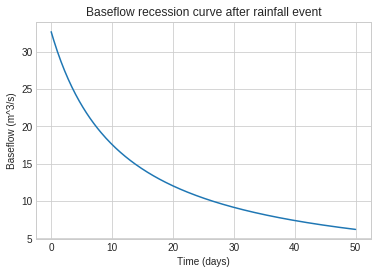

In [42]:
plt.plot(t,qb_s)
plt.xlabel('Time (days)')
plt.ylabel('Baseflow (m^3/s)')
plt.title('Baseflow recession curve after rainfall event')
